# SV Distribution
## How to measure distribution of SVs
Notes: 
Need to get X,Y coordinates of ROI pixels, as well as AZline pixels
1. Figure out how to get ROI data into Python! Line needs to be a list of pixel coordinates

    -Open synapse image. Open SV rois and PM rois. Draw a line for the AZ (PM_straightL end to PM_straightR end)
    
    -Select your AZ line-->File-->Save as...-->XY Coordinates. Save in Syn__ folder as Syn__AZ. 
    
     -This file is a list of all coordinates on your line but NOT in pixels yet. 

Synapses where this distance code may be a problem:

* Syn09

* Syn20

* Syn25

* Syn27

* Syn40

* Syn62

* Syn70

* Syn111

In [19]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
import seaborn as sns
sns.set()

## IMPORTANT NOTE ON AZ FILE FORMAT
If you saved your AZ.txt line with no scale on Fiji, img_conversion= 3716px/inch

If you saved your AZ.txt file while doing other analysis and you saved it with a scale, your img_conversion =0.27px/nm

In [35]:
Synapse_files = Path('Synapse Files/')
assert Synapse_files.exists()
for condition in Synapse_files.iterdir():
    for Synfolders in condition.iterdir():
        syn_sv = Synfolders / Path(Synfolders.name + 'SV.zip')
        assert syn_sv.exists()
        syn_az = Synfolders / Path(Synfolders.name + 'AZ.txt')
        assert syn_az.exists()
        
        syn_sv_unzipped = Synfolders / syn_sv.stem
        
        if not syn_sv_unzipped.exists():
            syn_sv_unzipped.mkdir()
        
        if not len(list(syn_sv_unzipped.iterdir())):
            syn_sv_zip = zipfile.ZipFile(str(syn_sv))
            syn_sv_zip.extractall(str(syn_sv_unzipped))
        
#         print(Synfolders.name, syn_az, syn_az.exists())
        
        
#         for file in Synfolders.iterdir():
     
    
    

In [37]:
print(syn_sv)

Synapse Files\Rescue\Syn72\Syn72SV.zip


In [41]:
#Code to turn AZ line into X,Y coordinates
img_conversion = 3716 #px/inch. 
df = np.round(pd.read_table(**syn_az**, header=None)*img_conversion, decimals=0)
df_diff = df.diff()
df_ed = np.sqrt(df_diff.iloc[:,0]**2 +df_diff.iloc[:,1]**2) #Finding Euclidean distance
        #This code will only give you some pixel X,Y coordinates

x_fin, y_fin = [], [] 
#You must get the distances of all X,Y coordinates on that line. 
#If the distance between 2 pixel points (above) is more than 1, fill in the blanks by 1
for i in range(len(df)): 
    x, y = df.iloc[i,:]
    x_fin.append(x)
    y_fin.append(y)
    if i == len(df) - 1:
        continue
    if df_ed.iloc[i+1] < 1.1:
        continue
    x_fin += list(np.linspace(x, df.iloc[i+1,0], int(df_ed[i+1])))
    y_fin += list(np.linspace(y, df.iloc[i+1,1], int(df_ed[i+1])))
L = np.array([x_fin,y_fin]).T    

#If you want to make sure it worked and see all of your X,Y values of your line now, uncomment Ltable_pd
Ltabletest = {'X values':x_fin, 'Y values':y_fin}
Ltable_pd = pd.DataFrame(Ltabletest)
#Ltable_pd
    #Notice now none of the values are more than 1px apart

,X values,Y values
0,480.0,683.0
1,480.0,683.0
2,479.0,682.0
3,478.0,681.0
4,477.0,680.0
5,477.0,680.0
6,477.0,680.0
7,476.0,679.0
8,476.0,678.0
9,475.0,678.0


In [4]:
#Code to get all SV X,Y Coordinates. Ensure Path import is done!

##Unzip SV folder
import zipfile
with zipfile.ZipFile("Syn51SV.zip","r") as zip_ref:
    zip_ref.extractall("Syn51 SV ROI//")
    
##Create path where all ROIs are    
vesicle_path = Path('Syn51 SV ROI//')
vesicle_path.exists()    

##Make an array called names where you will put the X,Y coordinates from the ROI file name
names = []
for file in vesicle_path.iterdir():
    names.append(file.stem)

##Create arrays for X and Y coordinates for reach SV    
names_split = [name.split('-') for name in names]
v_x, v_y = [], []
for y_str, x_str in names_split:
    v_x.append(int(x_str))
    v_y.append(int(y_str))
V = np.array([v_x,v_y]).T 
    
#If you want to make sure it worked and see all of your X,Y values of your SV, uncomment Vtable_pd
Vtabletest = {'X values':v_x, 'Y values':v_y}
Vtable_pd = pd.DataFrame(Vtabletest)
#Vtable_pd

In [ ]:
#Create variables for conditions
SVdistances_aSynCon = 
SVdistances_aSyn = 
SVdistances_ResCon = 
SVdistances_Rescue = 

In [5]:
#Standard distance formula
def distance(v,p):
    return np.sqrt((v[0]-p[0])**2 +(v[1]-p[1])**2)

#import V and L
V = np.array([v_x,v_y]).T 
L = np.array([x_fin,y_fin]).T  

#Find the shortest distance from each ROI in V to any one point in L
min_dist= []
for v in V:
    d_v = []
    for p in L:
        d_v.append(distance(v,p))
    min_dist.append(np.min(d_v))

In [6]:
#Turn your pixel distance into an array and multiply it by the pixel/nm scale to get distance in nm
SVdistances = np.array(min_dist)/0.27
SVdistances

array([ 562.07715631,  279.47549795,  343.20045124,  518.79304983,
        619.39049639,  445.00788966,  722.47716736,  643.61122009,
        338.72836381,  500.29913673,  640.88305914, 1005.14936417,
        963.8197352 ,  672.00897004,  460.59324857,  760.32341732,
        465.24138301,  545.68412218,  722.29222508,  564.07467564,
        968.01907053,   56.7652036 , 1065.07140425,  248.55256347,
        578.31505007,  797.55514327,  380.76053296,  477.99498639,
        275.60611679,  251.0493331 , 1038.47566208,  447.9083152 ,
        425.06529139, 1029.7603936 ,   29.9055451 ,  577.58196102,
        295.81747866,  921.24102428,  684.79470749,  175.57047718,
       1066.40706236,  773.02796867,  411.26743427,  652.35664791,
        457.24494242])

In [7]:
#to check, get L and V for Syn76, and check mean
mean_dist= np.mean(SVdistances)
mean_dist

574.6498876839664

Text(0.5, 1.0, 'Syn51- SV Distribution Code')

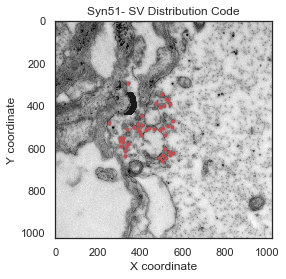

In [10]:
##To ensure code is working properly, plot your vesicles and line on top of the image. They should line up!

import matplotlib.pyplot as plt
im = plt.imread('Syn51.tif')
implot = plt.imshow(im, cmap='gray')
plt.scatter(v_x, v_y, color='r', marker='.', alpha=1)
plt.scatter(x_fin, y_fin, color='k', marker=1, alpha=0.7)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Syn51- SV Distribution Code")

#for i in range(0, len(v_x), 2):
#    plt.plot(,'r-')
    
#def connectpoints(x,y,p1,p2):
 #   v_x, x_fin = x[p1], x[p2]
  #  v_y, y_fin = y[p1], y[p2]
   # plt.plot([v_x,x_fin],[v_y,y_fin],'-')

#for k in range(0,len(v_x)):
 #   connectpoints(v_x,v_y,0,k)
  #  connectpoints(x_fin,y_fin,0,k)




In [98]:
#Bar graph of the means for each figure
#plt.bar(mean_dist, height=5000, width=20, bottom=None)

In [38]:
#Figure1, Con versus aSyn
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
#plt.hist(SVdistances, bins=20, color=black, alpha=0.8)

In [ ]:
#Figure5, Con versus Rescue
sns.set_style("white")
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=30, color=black, alpha=0.8)